# The Basic Concept of Zelibe Ugwuanyi Method
*By: Iyas Yustira, Dena Supriyanto*

**Reference**: [Zelibe, Samuel & Ugwuanyi, C. (2019). ON A NEW SOLUTION OF THE TRANSPORTATION PROBLEM](https://www.researchgate.net/publication/335972372_ON_A_NEW_SOLUTION_OF_THE_TRANSPORTATION_PROBLEM). 

## Model of a Transportation Problem

$$Minimize \hspace{0.3cm} Z = \sum_{i=1}^{m} X_{ij} C_{ij}$$

$$\sum_{j=1}^n X_{ij} \leq a_i, i = 1, 2, 3 \dots, m \hspace{0.3cm} (Demand \hspace{0.3cm} constraint)$$

$$\sum_{i=1}^m X_{ij} \geq b_j, j = 1, 2, 3, \dots, n \hspace{0.3cm} (Supply \hspace{0.3cm} constraint) $$

$$X_{ij} \geq 0,1,2,3,\dots,n$$

Where:
* m is the number of resources.
* n is the number of destinations.
* $a_i$ is the capacity of i th source.
* $b_j$ is the demand of j th destination.
* $c_{ij}$ is the the unit transportation cost between $i_{th}$ source and $j_{th}$
destination (in naira or as a distance in kilometers, miles, etc.)
* $x_{ij}$ is the size of material transported between $i_{th}$ source and $j_{th}$
destination (in tons, pounds, liters etc.)


A transportation problem is said to be unbalanced if and only if

$$\sum_{i=1} a_i \neq \sum_{i=1} b_j$$

There are two cases:

**Case (1)**
$$\sum_{i=1} a_i > \sum_{i=1} b_j$$

**Case (2)**
$$\sum_{i=1} a_i < \sum_{i=1} b_j$$

To balance the Transportation Problem,Introduce a dummy origin or source in the transportation table with a zero cost. The availability at this origin is:

$$\sum_{i=1} a_i - \sum_{i=1} b_j = 0$$

## Table And Network Illustration
1. The Transportation Network

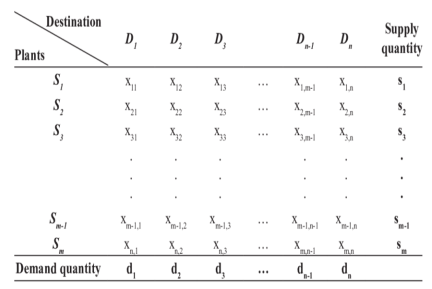


2. The Transportation Table

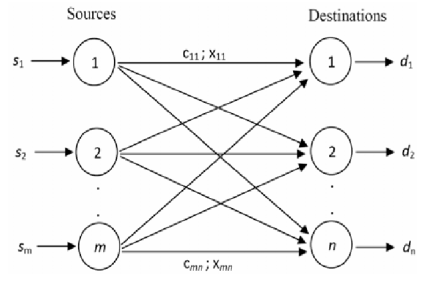

## Flowchart Solution of The Transportation Problem
* The problem is formulated as a transportation model
* Is the transportation model balanced?
* If yes, go to next step else, add dummy to the rows or column.
* Determine initial basic solutions.
* Go to next step if the solution is optimized else Go to fourth step.
* Using the optimal solution ,calculate the total transportation cost.

# NUMERICAL ILLUSTRATION

Consider the table where $X_{ij}$ is the number of
wheat (in tons) transported from each grain house to each mill $(i, j = 1, 2, 3)$. The total transportation cost for each route is the objective function. The solution is the number of tons of wheat to be transported from house to mill so as to minimize total cost of transportation.

In [1]:
import pandas as pd
import numpy as np

## Transportation model

In [2]:
d = {'Index': ['S1', 'S2', 'S3', 'Demand'], 
     'D1': [6, 7, 4, 200],
     'D2': [8, 11, 5, 100],
     'D3': [10, 11, 12, 300],
     'Supply': [150, 175, 275, 0]}
tm = pd.DataFrame(data=d)
tm.set_index('Index', inplace=True)
tm

,D1,D2,D3,Supply
Index,,,,
S1,6,8,10,150
S2,7,11,11,175
S3,4,5,12,275
Demand,200,100,300,0


## Check the balanced or unbalanced data

In [3]:
a = tm.Supply.sum()
b = tm.loc['Demand'].sum()
if a > b : # case 1
    print('Unbalanced data, total supply greater than total demand {:d} > {:d}'.format(a, b))
elif a < b : # case 2
    print('Unbalanced data, total supply less than total demand {:d} < {:d}'.format(a, b))
else: # balanced data
    print('Balanced data, total supply equal to total demand {:d}'.format(a))
    pass

Balanced data, total supply equal to total demand 600


In [4]:
# determine rows and columns penalty
tm['Penalty'] = np.zeros(tm.shape[0])
tm.loc['Penalty'] = np.zeros(tm.shape[1])
tm

,D1,D2,D3,Supply,Penalty
Index,,,,,
S1,6.0,8.0,10.0,150.0,0.0
S2,7.0,11.0,11.0,175.0,0.0
S3,4.0,5.0,12.0,275.0,0.0
Demand,200.0,100.0,300.0,0.0,0.0
Penalty,0.0,0.0,0.0,0.0,0.0


## First iteration

In [5]:
m = len(tm.index[:-2])
n = len(tm.columns[:-2])

print('Number of resources: {:d} \nNumber of destinations: {:d}'.format(m, n))

Number of resources: 3 
Number of destinations: 3


In [6]:
# rows penalty
for i in tm.index[:m]:
    lc_r = tm.loc[i][:n].min()
    tm.loc[i, 'Penalty'] = (tm.loc[i][:n] - lc_r).sum()+m

# columns penalty
for j in tm.columns[:m]:
    lc_c = tm[j][:m].min()
    tm.loc['Penalty', j] = (tm[j][:m] - lc_c).sum()+n

In [7]:
tm

,D1,D2,D3,Supply,Penalty
Index,,,,,
S1,6.0,8.0,10.0,150.0,9.0
S2,7.0,11.0,11.0,175.0,11.0
S3,4.0,5.0,12.0,275.0,12.0
Demand,200.0,100.0,300.0,0.0,0.0
Penalty,8.0,12.0,6.0,0.0,0.0


In [8]:
# determine x_ij for alocation cost
max_rp = tm['Penalty'][:m].max()
Si = tm['Penalty'][:m][tm['Penalty'][:m] == tm['Penalty'][:m].max()].index[0]

max_cp = tm.loc['Penalty'][:n].max()
Dj = tm.loc['Penalty'][:n][tm.loc['Penalty'][:n] == tm.loc['Penalty'][:n].max()].index[0]

print('Alocation to {:s} and {:s}'.format(Si, Dj))

Alocation to S3 and D2


In [9]:
# Alocation cost
cost = []

Xij = tm.loc[Si, Dj]
sup = tm.loc[Si, 'Supply']
dem = tm.loc['Demand', Dj]

if sup > dem:
    value = Xij*dem
    cost.append(value)
    tm.loc[Si, 'Supply'] = sup - dem
    tm = tm.drop(Dj, axis=1)
else:
    value = Xij*sup
    cost.append(value)
    tm.loc['Demand', Dj] = dem - sup
    tm = tm.drop(Si, axis=0)

print('Cost: {:.0f}'.format(value))

Cost: 500


In [10]:
tm

,D1,D3,Supply,Penalty
Index,,,,
S1,6.0,10.0,150.0,9.0
S2,7.0,11.0,175.0,11.0
S3,4.0,12.0,175.0,12.0
Demand,200.0,300.0,0.0,0.0
Penalty,8.0,6.0,0.0,0.0


## Sceond Iteration

In [11]:
m = len(tm.index[:-2])
n = len(tm.columns[:-2])

print('Number of resources: {:d} \nNumber of destinations: {:d}'.format(m, n))

Number of resources: 3 
Number of destinations: 2


In [12]:
# rows penalty
for i in tm.index[:m]:
    lc_r = tm.loc[i][:n].min()
    tm.loc[i, 'Penalty'] = (tm.loc[i][:n] - lc_r).sum()+m

# columns penalty
for j in tm.columns[:m]:
    lc_c = tm[j][:m].min()
    tm.loc['Penalty', j] = (tm[j][:m] - lc_c).sum()+n

In [13]:
tm

,D1,D3,Supply,Penalty
Index,,,,
S1,6.0,10.0,150.0,7.0
S2,7.0,11.0,175.0,7.0
S3,4.0,12.0,175.0,11.0
Demand,200.0,300.0,0.0,0.0
Penalty,7.0,5.0,52.0,0.0


In [14]:
# determine x_ij for alocation cost
max_rp = tm['Penalty'][:m].max()
Si = tm['Penalty'][:m][tm['Penalty'][:m] == tm['Penalty'][:m].max()].index[0]

max_cp = tm.loc['Penalty'][:n].max()
Dj = tm.loc['Penalty'][:n][tm.loc['Penalty'][:n] == tm.loc['Penalty'][:n].max()].index[0]

print('Alocation to {:s} and {:s}'.format(Si, Dj))

Alocation to S3 and D1


In [15]:
# Alocation cost
Xij = tm.loc[Si, Dj]
sup = tm.loc[Si, 'Supply']
dem = tm.loc['Demand', Dj]

if sup > dem:
    value = Xij*dem
    cost.append(value)
    tm.loc[Si, 'Supply'] = sup - dem
    tm = tm.drop(Dj, axis=1)
else:
    value = Xij*sup
    cost.append(value)
    tm.loc['Demand', Dj] = dem - sup
    tm = tm.drop(Si, axis=0)
    
print('Cost: {:.0f}'.format(value))

Cost: 700


In [16]:
tm

,D1,D3,Supply,Penalty
Index,,,,
S1,6.0,10.0,150.0,7.0
S2,7.0,11.0,175.0,7.0
Demand,25.0,300.0,0.0,0.0
Penalty,7.0,5.0,52.0,0.0


## Third iteration

In [17]:
m = len(tm.index[:-2])
n = len(tm.columns[:-2])

print('Number of resources: {:d} \nNumber of destinations: {:d}'.format(m, n))

Number of resources: 2 
Number of destinations: 2


In [18]:
# rows penalty
for i in tm.index[:m]:
    lc_r = tm.loc[i][:n].min()
    if n == 2:
        tm.loc[i, 'Penalty'] = (tm.loc[i][:n] - lc_r).sum()
    else:
        tm.loc[i, 'Penalty'] = (tm.loc[i][:n] - lc_r).sum()+m

# columns penalty
for j in tm.columns[:m]:
    lc_c = tm[j][:m].min()
    if m == 2:
        tm.loc['Penalty', j] = (tm[j][:m] - lc_c).sum()
    else:
        tm.loc['Penalty', j] = (tm[j][:m] - lc_c).sum()+n

In [19]:
tm

,D1,D3,Supply,Penalty
Index,,,,
S1,6.0,10.0,150.0,4.0
S2,7.0,11.0,175.0,4.0
Demand,25.0,300.0,0.0,0.0
Penalty,1.0,1.0,52.0,0.0


In [20]:
# determine x_ij for alocation cost
if len(tm['Penalty'][:m].unique()) > 0:
    Si = tm['Supply'][:m][tm['Supply'][:m] == tm['Supply'][:m].max()].index[0]
else:
    max_rp = tm['Penalty'][:m].max()
    Si = tm['Penalty'][:m][tm['Penalty'][:m] == tm['Penalty'][:m].max()].index[0]
    Di = tm.loc['Demand'][:n][tm.loc['Demand'][:n] == tm.loc['Demand'][:n].min()].index[0]
    
print('Alocation to {:s} and {:s}'.format(Si, Dj))

Alocation to S2 and D1


In [21]:
# Alocation cost
Xij = tm.loc[Si, Dj]
sup = tm.loc[Si, 'Supply']
dem = tm.loc['Demand', Dj]

if sup > dem:
    value = Xij*dem
    cost.append(value)
    tm.loc[Si, 'Supply'] = sup - dem
    tm = tm.drop(Dj, axis=1)
else:
    value = Xij*sup
    cost.append(value)
    tm.loc['Demand', Dj] = dem - sup
    tm = tm.drop(Si, axis=0)
    
'Cost: {:.0f}'.format(value)

'Cost: 175'

In [22]:
tm

,D3,Supply,Penalty
Index,,,
S1,10.0,150.0,4.0
S2,11.0,150.0,4.0
Demand,300.0,0.0,0.0
Penalty,1.0,52.0,0.0


## Forth iteration

In [23]:
m = len(tm.index[:-2])
n = len(tm.columns[:-2])

'Number of resources: {:d} \nNumber of destinations: {:d}'.format(m, n)

'Number of resources: 2 \nNumber of destinations: 1'

In [24]:
# rows penalty
for i in tm.index[:m]:
    lc_r = tm.loc[i][:n].min()
    if n == 1:
        tm.loc[i, 'Penalty'] = tm.loc[i][:n][0]
    elif n == 2:
        tm.loc[i, 'Penalty'] = (tm.loc[i][:n] - lc_r).sum()
    else:
        tm.loc[i, 'Penalty'] = (tm.loc[i][:n] - lc_r).sum()+m

# columns penalty
for j in tm.columns[:m]:
    lc_c = tm[j][:m].min()
    if m == 1:
        tm.loc['Penalty', j] = tm[j][:n][0]
    elif m == 2:
        tm.loc['Penalty', j] = (tm[j][:m] - lc_c).sum()
    else:
        tm.loc['Penalty', j] = (tm[j][:m] - lc_c).sum()+n

In [25]:
tm

,D3,Supply,Penalty
Index,,,
S1,10.0,150.0,10.0
S2,11.0,150.0,11.0
Demand,300.0,0.0,0.0
Penalty,1.0,0.0,0.0


In [26]:
# determine x_ij for alocation cost
max_rp = tm['Penalty'][:m].max()
Si = tm['Penalty'][:m][tm['Penalty'][:m] == tm['Penalty'][:m].max()].index[0]

max_cp = tm.loc['Penalty'][:n].max()
Dj = tm.loc['Penalty'][:n][tm.loc['Penalty'][:n] == tm.loc['Penalty'][:n].max()].index[0]

'Alocation to {:s} and {:s}'.format(Si, Dj)

'Alocation to S2 and D3'

In [27]:
# Alocation cost
Xij = tm.loc[Si, Dj]
sup = tm.loc[Si, 'Supply']
dem = tm.loc['Demand', Dj]

if sup > dem:
    value = Xij*dem
    cost.append(value)
    tm.loc[Si, 'Supply'] = sup - dem
    tm = tm.drop(Dj, axis=1)
else:
    value = Xij*sup
    cost.append(value)
    tm.loc['Demand', Dj] = dem - sup
    tm = tm.drop(Si, axis=0)

'Cost: {:.0f}'.format(value)

'Cost: 1650'

In [28]:
tm

,D3,Supply,Penalty
Index,,,
S1,10.0,150.0,10.0
Demand,150.0,0.0,0.0
Penalty,1.0,0.0,0.0


## Final Iteration

In [29]:
m = len(tm.index[:-2])
n = len(tm.columns[:-2])

'Number of resources: {:d} \nNumber of destinations: {:d}'.format(m, n)

'Number of resources: 1 \nNumber of destinations: 1'

In [30]:
Si = tm.index[:m][0]
Dj = tm.columns[:n][0]
'Alocation to {:s} and {:s}'.format(Si, Dj)

'Alocation to S1 and D3'

In [31]:
Xij = tm.loc[Si, Dj]
sup = tm.loc[Si, 'Supply']
dem = tm.loc['Demand', Dj]

value = Xij*dem
cost.append(value)
'Cost: {:.0f}'.format(value)

'Cost: 1500'

## Totsl Cost

In [32]:
tot_cost = np.array(cost).sum()
'Total Cost: {:.0f}'.format(tot_cost)

'Total Cost: 4525'